In [3]:
import tensorflow as tf


In [4]:
tf.__version__

'2.4.1'

In [5]:
data = "./"

In [6]:
train_link  = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [7]:
## Thu vien dung de load file
import pickle

In [8]:
with open(train_link, mode="rb") as f:
    train = pickle.load(f)
with open(valid_link, mode="rb") as f:
    valid = pickle.load(f)
with open(test_link, mode="rb") as f:
    test = pickle.load(f)

In [9]:
trainX = train["features"]
trainY = train["labels"]

In [10]:
import matplotlib.pyplot as plt

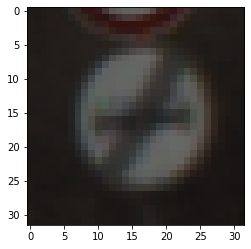

In [11]:
plt.imshow(trainX[12])

In [12]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [13]:
classNames[trainY[0]]

'End of no passing'

In [14]:
from sklearn.utils import shuffle

In [15]:
trainX, trainY = shuffle(trainX, trainY)

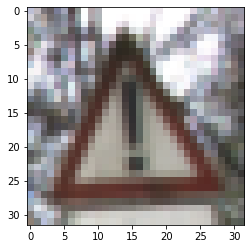

In [16]:
plt.imshow(trainX[0])


In [17]:
validX = valid["features"]
validY = valid["labels"]

In [18]:
testX = test["features"]
testY = test["labels"]

In [19]:
# Buoc tiep theo la phai chuan hoa ve [0,1]

trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [20]:
trainX[0]

array([[[0.74117647, 0.74901961, 0.83137255],
        [0.75294118, 0.7254902 , 0.74901961],
        [0.49411765, 0.47058824, 0.49019608],
        ...,
        [0.61568627, 0.63921569, 0.65098039],
        [0.60784314, 0.59215686, 0.64313725],
        [0.59607843, 0.59215686, 0.65490196]],

       [[0.82745098, 0.81960784, 0.85098039],
        [0.64705882, 0.64313725, 0.65098039],
        [0.6627451 , 0.60784314, 0.58823529],
        ...,
        [0.56470588, 0.57647059, 0.57647059],
        [0.55294118, 0.52941176, 0.56078431],
        [0.61176471, 0.58039216, 0.63137255]],

       [[0.58039216, 0.59607843, 0.64705882],
        [0.70588235, 0.73333333, 0.77254902],
        [0.7254902 , 0.68235294, 0.66666667],
        ...,
        [0.5254902 , 0.51372549, 0.54117647],
        [0.61960784, 0.62352941, 0.63137255],
        [0.69803922, 0.6627451 , 0.71764706]],

       ...,

       [[0.65882353, 0.68235294, 0.71764706],
        [0.88235294, 0.90980392, 0.93333333],
        [0.82352941, 0

In [21]:
# Chuyen labels sang dang one-hot encoding
from sklearn.preprocessing import LabelBinarizer

In [22]:
lb  = LabelBinarizer()

In [23]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [55]:
# Xay dung model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [25]:
model = Sequential()

In [26]:
width = 32
height = 32
classes = 43

In [27]:
shape = (width, height, 3)

In [28]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [29]:
model.add(Activation("relu"))

In [30]:
model.add(BatchNormalization())

In [31]:
model.add(Conv2D(32, (3,3), padding="same"))

In [32]:
model.add(Activation("relu"))

In [33]:
model.add(BatchNormalization())

In [34]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
model.add(Conv2D(64, (3,3), padding="same"))

In [36]:
model.add(Activation("relu"))

In [37]:
model.add(BatchNormalization())

In [38]:
model.add(Conv2D(64, (3,3), padding="same"))


In [39]:
model.add(Activation("relu"))


In [40]:
model.add(BatchNormalization())


In [41]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(512))

In [44]:
model.add(Activation("relu"))

In [45]:
model.add(BatchNormalization())

In [46]:
model.add(Dense(classes))

In [47]:
model.add(Activation("softmax"))


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [51]:
# Data augmentation

aug = ImageDataGenerator(rotation_range=0.20, height_shift_range=0.2, zoom_range=0.5, horizontal_flip=True, vertical_flip=True)

In [52]:
learning_rate = 0.01

In [53]:
epochs = 10

batch_size = 64

In [59]:
model.compile(optimizer=SGD(learning_rate=learning_rate, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])

In [61]:
print("Starting training ...")

model_trained = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1 )

Starting training ...
Epoch 1/10
543/543 [==============================] - 164s 301ms/step - loss: 1.0065 - accuracy: 0.6688 - val_loss: 1.2316 - val_accuracy: 0.6159

In [65]:
model.save("model_trained.h5")

In [73]:
result = model.predict(testX[0:1])

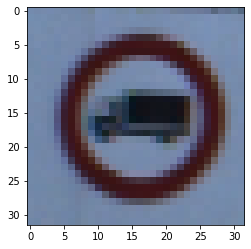

In [71]:
plt.imshow(testX[0])

In [72]:
import numpy as np

In [74]:
final = np.argmax(result)

In [75]:
classNames[final]


'Vehicles over 3.5 metric tons prohibited'